<a href="https://colab.research.google.com/github/DaverArenas/MachineLearning_Introduction/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

# Maquina de Vector Soporte

- Es un modelo usado tanto para clasificacion como regresion.
- Se basa en el principio de Hiperplanos los cuales separan mis datos (clasificacion)
- La margen del hiperplano se construye de una manera en la que se busca maximizar la distancia entre los datos y el hiperplano.

<img src="https://imgur.com/0X4TpzU.png" width="500px"/>

## Funcion de Perdida

Primero recordemos la funcion de perdida **log-loss**

<center>
$J(\theta)=\frac{1}{m}\sum^{m}_{i=1}[y^{(i)}(-log(\hat{p}^{(i)}))+(1-y^{(i)})(-log(1-\hat{p}^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$
</center>

Como bien sabemos nuestro $J(θ)$ penaliza los errores o las malas clasificaciones gracias a que nuestro funcion de $log$, penalizamos $p$ pequenias cuando $y$ es 1 y $p$ altas cuando $y$ es 0.

Ahora para nuestra funcion de perdida de la maquina de vector soporte reemplazamos el log por una funcion de optimizacion.

<center>
$J(\vec{w},b)=C\sum^{m}_{i=1}max(0, 1-t^{(i)}(\vec{w}^{T}\cdot\vec{x}^{(i)}+b)) + \frac{1}{2}\sum_{j=1}^{n}w_j^2$
</center>

Esta funcion de perdida hace uso del **Hinge loss** el cual introduce unas margenes y penaliza todo incumplimiento de esta por valores, ya sea de manera dura o suave.

## Programemos


Vamos a realizar un ejemplo de un modelo de Regresion Lineal.

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

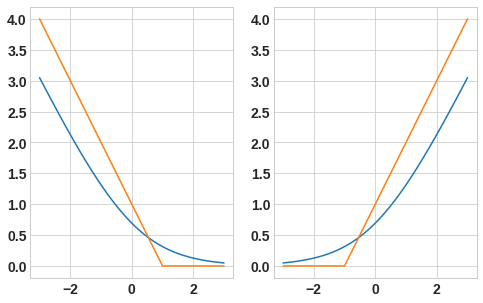

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
z = np.linspace(-3,3,num=100)
ax[0].plot(z, -np.log(sigmoid(z)))
ax[0].plot(z, np.maximum(0, 1-z))
ax[1].plot(z, -np.log(1 - sigmoid(z)))
ax[1].plot(z, np.maximum(0, 1+z))

In [ ]:
##sklearn tiene varios datasets que podemos cargar y usar para practicar
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = pd.Series(iris['target'])

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_df, y, test_size=0.2, random_state=2)

In [ ]:
svc = LinearSVC(C=0.1, loss='hinge', max_iter=100000)
svc.fit(X_train, y_train)

LinearSVC(C=0.1, loss='hinge', max_iter=100000)

In [ ]:
svc.predict(X_test)

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 2, 0, 2])

In [ ]:
#Importamos librerias para la métrica
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Creamos una función que retorne un dictionary con el reporte de la métrica de la clasificación
def imprimir_estado(mod,X_train, X_test, y_train, y_test):
  pred = mod.predict(X_test)
  mod_rep = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
  print(confusion_matrix(y_test,pred))
  return mod_rep

In [ ]:
imprimir_estado(svc,X_train, X_test, y_train, y_test)

[[14  0  0]
 [ 0  1  7]
 [ 0  0  8]]


,0,1,2,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.533333,0.766667,0.844444,0.875556
recall,1.0,0.125000,1.000000,0.766667,0.708333,0.766667
f1-score,1.0,0.222222,0.695652,0.766667,0.639291,0.711433
support,14.0,8.000000,8.000000,0.766667,30.000000,30.000000


Eliminar columna sepal width ayuda a mejorar el modelo

#No Lineal. Clase 16/05/2022

In [ ]:
from sklearn.datasets import make_moons
import pandas as pd

In [ ]:
X , y = make_moons(n_samples = 10000, noise=0.05, random_state=2)
data = pd.DataFrame(X, columns=['x_1', 'x_2'])
data['y'] = y
data.head(10)

,x_1,x_2,y
0,1.259130,-0.482953,1
1,-0.536681,0.961496,0
2,0.408225,1.035087,0
3,-1.027448,0.400108,0
4,-0.943872,-0.002054,0
5,-1.015368,0.017166,0
6,0.858208,-0.471172,1
7,0.700799,0.739187,0
8,0.464840,0.881176,0
9,-0.962529,0.192031,0


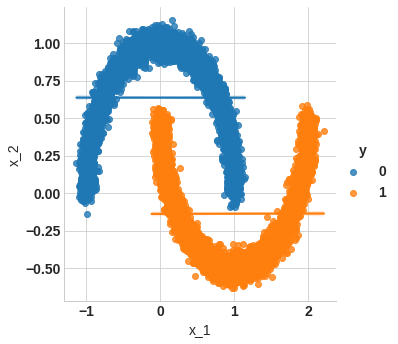

In [ ]:
#Modelo Lineal de los datos. Este modelo claramente no representa el comportamiento real de los datos, que se muestran no lineales
sns.lmplot(x='x_1', y='x_2', hue='y', data=data)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
ply = PolynomialFeatures(degree=3, include_bias=False)
Xply = ply.fit_transform(X)

In [ ]:
#Gráficas en la misma escala
scaler = StandardScaler()
Xplystd = scaler.fit_transform(Xply)

In [ ]:
svm_clf = LinearSVC(C=1, loss='hinge', max_iter=10000)
svm_clf.fit(Xplystd, y)

LinearSVC(C=1, loss='hinge', max_iter=10000)

In [ ]:
svm_clf.intercept_

array([0.00192365])

In [ ]:
X0, X1 = X[:,0], X[:,1]

In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )
  return xx, yy

In [ ]:
xx0, xx1 = make_meshgrid(X0, X1)

In [ ]:
xgrid = np.c_[xx0.ravel(), xx1.ravel()]

In [ ]:
xgridpoly = ply.transform(xgrid)

In [ ]:
xgridpolystan = scaler.transform(xgridpoly)

In [ ]:
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0]
Z = Z.reshape(xx0.shape)

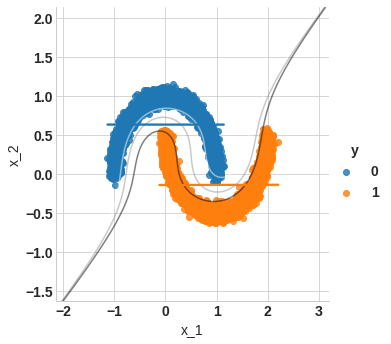

In [ ]:
sns.lmplot(x='x_1', y='x_2', hue='y', data=data)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])

EL TRUCO DEL KERNEL

In [ ]:
from sklearn.svm import SVC
Xstan = scaler.fit_transform(X)
svm = SVC(kernel='poly', degree=3, C=1, coef0=1)
svm.fit(Xstan, y)

SVC(C=1, coef0=1, kernel='poly')

In [ ]:
X0, X1 = X[:,0], X[:,1]
xx0, xx1 = make_meshgrid(X0, X1)
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

In [ ]:
Z = svm.predict(xgridstan)
Z = Z.reshape(xx0.shape)

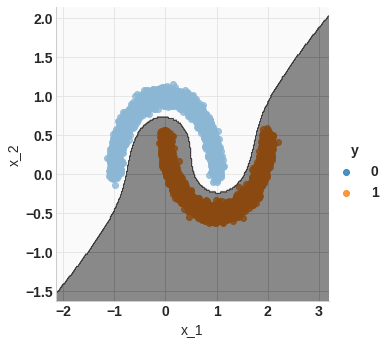

In [ ]:
sns.lmplot(x='x_1', y='x_2', hue='y', data=data, fit_reg=False)
plt.contourf(xx0, xx1, Z, alpha=0.5)